In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as MSE

In [189]:
# 訓練用データ
train_path = './competition/' + 'train' + '.csv'

In [190]:
# 訓練用データの読み込み
train_df = pd.read_csv(train_path)

In [191]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   dateid         337 non-null    object 
 1   y              337 non-null    float64
 2   week           337 non-null    object 
 3   soldout        337 non-null    int64  
 4   name           337 non-null    object 
 5   kcal           304 non-null    float64
 6   remarks        49 non-null     object 
 7   event          28 non-null     object 
 8   payday         17 non-null     float64
 9   weather        337 non-null    object 
 10  precipitation  337 non-null    float64
 11  temperature    337 non-null    float64
dtypes: float64(5), int64(1), object(6)
memory usage: 31.7+ KB


In [192]:
train_df

,dateid,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2014-04-01,125.0,Tue,1,メンチカツ,377.0,NaN,NaN,NaN,晴時々薄曇,0.0,13.9
1,2014-04-02,99.0,Wed,0,肉じゃが,380.0,NaN,NaN,NaN,薄曇一時晴,0.0,15.2
2,2014-04-03,100.0,Thu,1,酢豚,390.0,NaN,NaN,NaN,大雨,65.0,13.8
3,2014-04-04,90.0,Fri,1,和風ソースハンバーグ,350.0,NaN,NaN,NaN,晴時々曇一時雨、雷を伴う,40.0,15.3
4,2014-04-07,107.0,Mon,0,青梗菜牛肉炒め,387.0,NaN,NaN,NaN,晴後一時薄曇,0.0,11.4
...,...,...,...,...,...,...,...,...,...,...,...,...
332,2015-08-21,137.0,Fri,0,チキンカレー,NaN,お楽しみメニュー,NaN,NaN,曇後一時雨,2.5,26.0
333,2015-09-01,80.0,Tue,1,自家製手作りトンカツ,423.0,弁当種類増↓,NaN,NaN,雨後曇、雷を伴う,12.0,23.7
334,2015-09-02,74.0,Wed,0,チーズメンチカツ,463.0,NaN,NaN,NaN,曇時々雨後晴,5.5,26.9
335,2015-09-03,66.0,Thu,1,鶏肉黒胡椒焼きおろしソース,420.0,NaN,NaN,NaN,曇後一時雨,1.5,25.7


### 特記事項をラベルに

In [193]:
le = le.fit(train_df['remarks'])
train_df['remarks_label'] = le.transform(train_df['remarks'])

### イベントもラベルに

In [194]:
le = le.fit(train_df['event'])
train_df['event_label'] = le.transform(train_df['event'])

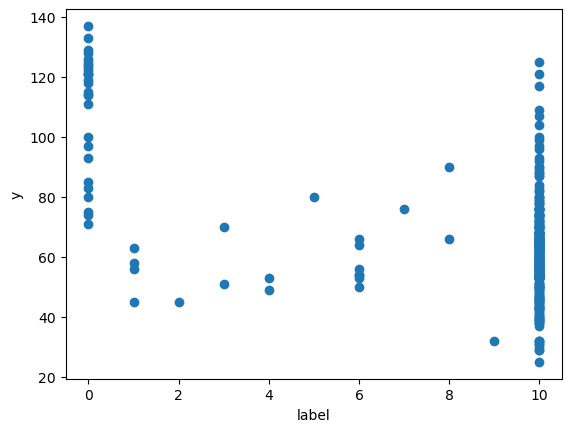

In [195]:
plt.scatter(train_df['remarks_label'],train_df['y'])
plt.xlabel('label')
plt.ylabel('y')
plt.show()

In [196]:
train_df

,dateid,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,remarks_label,event_label
0,2014-04-01,125.0,Tue,1,メンチカツ,377.0,NaN,NaN,NaN,晴時々薄曇,0.0,13.9,10,2
1,2014-04-02,99.0,Wed,0,肉じゃが,380.0,NaN,NaN,NaN,薄曇一時晴,0.0,15.2,10,2
2,2014-04-03,100.0,Thu,1,酢豚,390.0,NaN,NaN,NaN,大雨,65.0,13.8,10,2
3,2014-04-04,90.0,Fri,1,和風ソースハンバーグ,350.0,NaN,NaN,NaN,晴時々曇一時雨、雷を伴う,40.0,15.3,10,2
4,2014-04-07,107.0,Mon,0,青梗菜牛肉炒め,387.0,NaN,NaN,NaN,晴後一時薄曇,0.0,11.4,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,2015-08-21,137.0,Fri,0,チキンカレー,NaN,お楽しみメニュー,NaN,NaN,曇後一時雨,2.5,26.0,0,2
333,2015-09-01,80.0,Tue,1,自家製手作りトンカツ,423.0,弁当種類増↓,NaN,NaN,雨後曇、雷を伴う,12.0,23.7,5,2
334,2015-09-02,74.0,Wed,0,チーズメンチカツ,463.0,NaN,NaN,NaN,曇時々雨後晴,5.5,26.9,10,2
335,2015-09-03,66.0,Thu,1,鶏肉黒胡椒焼きおろしソース,420.0,NaN,NaN,NaN,曇後一時雨,1.5,25.7,10,2


In [197]:
### 訓練用データの欠損値の補完
train_df['kcal'] = train_df['kcal'].fillna(method = 'ffill')
train_df = train_df.fillna({'payday': 0.0})

In [198]:
train_df

,dateid,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,remarks_label,event_label
0,2014-04-01,125.0,Tue,1,メンチカツ,377.0,NaN,NaN,0.0,晴時々薄曇,0.0,13.9,10,2
1,2014-04-02,99.0,Wed,0,肉じゃが,380.0,NaN,NaN,0.0,薄曇一時晴,0.0,15.2,10,2
2,2014-04-03,100.0,Thu,1,酢豚,390.0,NaN,NaN,0.0,大雨,65.0,13.8,10,2
3,2014-04-04,90.0,Fri,1,和風ソースハンバーグ,350.0,NaN,NaN,0.0,晴時々曇一時雨、雷を伴う,40.0,15.3,10,2
4,2014-04-07,107.0,Mon,0,青梗菜牛肉炒め,387.0,NaN,NaN,0.0,晴後一時薄曇,0.0,11.4,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,2015-08-21,137.0,Fri,0,チキンカレー,418.0,お楽しみメニュー,NaN,0.0,曇後一時雨,2.5,26.0,0,2
333,2015-09-01,80.0,Tue,1,自家製手作りトンカツ,423.0,弁当種類増↓,NaN,0.0,雨後曇、雷を伴う,12.0,23.7,5,2
334,2015-09-02,74.0,Wed,0,チーズメンチカツ,463.0,NaN,NaN,0.0,曇時々雨後晴,5.5,26.9,10,2
335,2015-09-03,66.0,Thu,1,鶏肉黒胡椒焼きおろしソース,420.0,NaN,NaN,0.0,曇後一時雨,1.5,25.7,10,2


In [199]:
train_df = train_df.drop(['remarks','event'],axis=1)

In [200]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   dateid         337 non-null    object 
 1   y              337 non-null    float64
 2   week           337 non-null    object 
 3   soldout        337 non-null    int64  
 4   name           337 non-null    object 
 5   kcal           337 non-null    float64
 6   payday         337 non-null    float64
 7   weather        337 non-null    object 
 8   precipitation  337 non-null    float64
 9   temperature    337 non-null    float64
 10  remarks_label  337 non-null    int32  
 11  event_label    337 non-null    int32  
dtypes: float64(5), int32(2), int64(1), object(4)
memory usage: 29.1+ KB


#### 'メニュー'と '天気'はラベルエンコーディング

In [201]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [202]:
le = le.fit(train_df['name'])
train_df['name_label'] = le.transform(train_df['name'])

In [203]:
le = le.fit(train_df['weather'])
train_df['weather_label'] = le.transform(train_df['weather'])

In [204]:
le = le.fit(train_df['week'])
train_df['week_label'] = le.transform(train_df['week'])

In [205]:
### いったん、訓練用データを確認
train_df

,dateid,y,week,soldout,name,kcal,payday,weather,precipitation,temperature,remarks_label,event_label,name_label,weather_label,week_label
0,2014-04-01,125.0,Tue,1,メンチカツ,377.0,0.0,晴時々薄曇,0.0,13.9,10,2,98,22,3
1,2014-04-02,99.0,Wed,0,肉じゃが,380.0,0.0,薄曇一時晴,0.0,15.2,10,2,158,47,4
2,2014-04-03,100.0,Thu,1,酢豚,390.0,0.0,大雨,65.0,13.8,10,2,183,0,2
3,2014-04-04,90.0,Fri,1,和風ソースハンバーグ,350.0,0.0,晴時々曇一時雨、雷を伴う,40.0,15.3,10,2,109,19,0
4,2014-04-07,107.0,Mon,0,青梗菜牛肉炒め,387.0,0.0,晴後一時薄曇,0.0,11.4,10,2,185,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,2015-08-21,137.0,Fri,0,チキンカレー,418.0,0.0,曇後一時雨,2.5,26.0,0,2,52,32,0
333,2015-09-01,80.0,Tue,1,自家製手作りトンカツ,423.0,0.0,雨後曇、雷を伴う,12.0,23.7,5,2,163,57,3
334,2015-09-02,74.0,Wed,0,チーズメンチカツ,463.0,0.0,曇時々雨後晴,5.5,26.9,10,2,66,44,4
335,2015-09-03,66.0,Thu,1,鶏肉黒胡椒焼きおろしソース,420.0,0.0,曇後一時雨,1.5,25.7,10,2,209,32,2


In [206]:
X = train_df.drop(['dateid', 'y', 'name','weather'], axis = 1)
y = train_df['y']

In [207]:
X

,week,soldout,kcal,payday,precipitation,temperature,remarks_label,event_label,name_label,weather_label,week_label
0,Tue,1,377.0,0.0,0.0,13.9,10,2,98,22,3
1,Wed,0,380.0,0.0,0.0,15.2,10,2,158,47,4
2,Thu,1,390.0,0.0,65.0,13.8,10,2,183,0,2
3,Fri,1,350.0,0.0,40.0,15.3,10,2,109,19,0
4,Mon,0,387.0,0.0,0.0,11.4,10,2,185,9,1
...,...,...,...,...,...,...,...,...,...,...,...
332,Fri,0,418.0,0.0,2.5,26.0,0,2,52,32,0
333,Tue,1,423.0,0.0,12.0,23.7,5,2,163,57,3
334,Wed,0,463.0,0.0,5.5,26.9,10,2,66,44,4
335,Thu,1,420.0,0.0,1.5,25.7,10,2,209,32,2


In [208]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   week           337 non-null    object 
 1   soldout        337 non-null    int64  
 2   kcal           337 non-null    float64
 3   payday         337 non-null    float64
 4   precipitation  337 non-null    float64
 5   temperature    337 non-null    float64
 6   remarks_label  337 non-null    int32  
 7   event_label    337 non-null    int32  
 8   name_label     337 non-null    int32  
 9   weather_label  337 non-null    int32  
 10  week_label     337 non-null    int32  
dtypes: float64(4), int32(5), int64(1), object(1)
memory usage: 22.5+ KB


In [209]:
### 'week'のダミー変数化
#X = pd.get_dummies(X)
X = X.drop(['week'],axis = 1)

In [210]:
X

,soldout,kcal,payday,precipitation,temperature,remarks_label,event_label,name_label,weather_label,week_label
0,1,377.0,0.0,0.0,13.9,10,2,98,22,3
1,0,380.0,0.0,0.0,15.2,10,2,158,47,4
2,1,390.0,0.0,65.0,13.8,10,2,183,0,2
3,1,350.0,0.0,40.0,15.3,10,2,109,19,0
4,0,387.0,0.0,0.0,11.4,10,2,185,9,1
...,...,...,...,...,...,...,...,...,...,...
332,0,418.0,0.0,2.5,26.0,0,2,52,32,0
333,1,423.0,0.0,12.0,23.7,5,2,163,57,3
334,0,463.0,0.0,5.5,26.9,10,2,66,44,4
335,1,420.0,0.0,1.5,25.7,10,2,209,32,2


In [211]:
###特徴量重要度を測る指標の作成
X_feature = np.array(list(X.columns))

In [212]:
## 値の要素化
X = X.values
y = y.values

In [213]:
X_train,X_test, y_train,y_test = X[:270],X[270:],y[:270],y[270:]

In [214]:
params = {"n_estimators": [10,20,30,40, 50,100, 300, 500], 
          "max_depth": [3,5,10,15, 20,None], 
          "max_features": ["sqrt", "log2",None]}

In [215]:
model_a = RandomForestRegressor(random_state = 30)

In [216]:
model_a = GridSearchCV(model_a, params,scoring="neg_mean_squared_error")

In [217]:
model_a.fit(X_train,y_train)
print(model_a.best_params_)

{'max_depth': 3, 'max_features': None, 'n_estimators': 10}


In [218]:
forest_a = model_a.best_estimator_

In [219]:
#予測値の算出
y_pred_train = forest_a.predict(X_train)
y_pred_test = forest_a.predict(X_test)
#MSEの算出
mse_train = MSE(y_train, y_pred_train)
mse_test = MSE(y_test, y_pred_test)
#RMSEの算出
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
#RMSEの表示
print('訓練データに対しては'+ ' ' + str(rmse_train))
print('評価データに対しては'+ ' ' + str(rmse_test))

訓練データに対しては 13.407419081424454
評価データに対しては 13.928683770693226


In [220]:
model_b = RandomForestRegressor(random_state = 40)

In [221]:
model_b.fit(X_train,y_train)

RandomForestRegressor(random_state=40)

In [222]:
#予測値の算出
y_pred_train = model_b.predict(X_train)
y_pred_test = model_b.predict(X_test)
#MSEの算出
mse_train = MSE(y_train, y_pred_train)
mse_test = MSE(y_test, y_pred_test)
#RMSEの算出
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
#RMSEの表示
print('訓練データに対しては'+ ' ' + str(rmse_train))
print('評価データに対しては'+ ' ' + str(rmse_test))

訓練データに対しては 5.586115194208133
評価データに対しては 13.552370558732301


In [223]:
feature_importance = pd.DataFrame({'feature':X_feature,'importances': forest_a.feature_importances_}).sort_values(by="importances", ascending=False)

In [224]:
### 特徴量重要度の図示
feature_importance

,feature,importances
5,remarks_label,0.625969
1,kcal,0.100609
4,temperature,0.091404
7,name_label,0.075813
3,precipitation,0.050827
9,week_label,0.036031
8,weather_label,0.011812
0,soldout,0.007536
2,payday,0.000000
6,event_label,0.000000
